In [234]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split, PredefinedSplit
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

from datetime import datetime

import warnings
warnings.filterwarnings(action='ignore')

import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
import imblearn as imb

In [236]:
import sys
sys.path.append('src')

In [237]:
from preprocessing import *
from plots import *

In [238]:
df = pd.read_csv('data/application_info.csv', low_memory=False)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 98 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 307511 non-null  int64  
 1   id                         307511 non-null  int64  
 2   default                    307511 non-null  int64  
 3   contract_type              307511 non-null  object 
 4   gender                     307511 non-null  object 
 5   flag_vehicle               307511 non-null  object 
 6   flag_properties            307511 non-null  object 
 7   num_children               307511 non-null  int64  
 8   total_income               307511 non-null  object 
 9   loan_amount                307511 non-null  object 
 10  anual_payment              307499 non-null  object 
 11  product_amount             307233 non-null  object 
 12  accompained                306219 non-null  object 
 13  income_type                30

,Unnamed: 0,id,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,...,total_area,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year
0,0,100002,1,personal loan,M,N,Y,0,202500,"406597,5",...,"0,0149",brick,N,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,personal loan,F,N,N,0,270000,"1293502,5",...,"0,0714",concrete,N,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,credit card,M,Y,Y,0,67500,135000,...,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,personal loan,F,N,Y,0,135000,"312682,5",...,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,0,personal loan,M,N,Y,0,121500,513000,...,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
df.sample(10)

,Unnamed: 0,id,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,...,total_area,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year
203130,203130,335493,0,personal loan,F,N,N,0,121500,810000,...,"0,1141",panel,N,-577.0,0.0,0.0,0.0,0.0,0.0,2.0
109471,109471,226959,0,personal loan,F,N,N,0,207000,857655,...,"0,0517",brick,N,-859.0,NaN,NaN,NaN,NaN,NaN,NaN
23761,23761,127648,0,personal loan,F,N,Y,0,166500,180000,...,"0,0766",brick,N,-1573.0,0.0,0.0,0.0,0.0,1.0,3.0
23992,23992,127901,0,personal loan,M,Y,N,0,247500,855000,...,"0,2857",panel,N,-935.0,0.0,0.0,0.0,0.0,0.0,1.0
222531,222531,357766,0,personal loan,M,Y,N,0,171000,343800,...,NaN,NaN,NaN,-2215.0,NaN,NaN,NaN,NaN,NaN,NaN
240613,240613,378644,0,personal loan,F,N,N,0,193500,675000,...,"0,2013",panel,N,-1597.0,0.0,0.0,0.0,0.0,0.0,3.0
173232,173232,300747,0,personal loan,F,N,Y,1,202500,497520,...,"0,0935",brick,N,-463.0,NaN,NaN,NaN,NaN,NaN,NaN
82155,82155,195273,0,credit card,M,Y,Y,0,1125000,9e+05,...,"0,0889",brick,N,-591.0,NaN,NaN,NaN,NaN,NaN,NaN
187614,187614,317491,0,personal loan,M,Y,Y,1,180000,"1515415,5",...,"0,1297",brick,N,-277.0,0.0,0.0,0.0,0.0,0.0,7.0
244697,244697,383231,1,personal loan,F,N,N,0,112500,545040,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing and EDA

Some numeric variabes have a , as decimal separator, I will find them to change it to . and convert the variables to numeric

In [240]:
# Find variables with comma (,)
cols_with_comma = list()
for col in df.select_dtypes('object').columns:
    if any(df[col].str.contains(',')):
        cols_with_comma.append(col)
    else:
        pass
    
print(len(cols_with_comma))
print(cols_with_comma)

57
['total_income', 'loan_amount', 'anual_payment', 'product_amount', 'accompained', 'normalised_pop', 'registry_age', 'occupation', 'external_score_1', 'external_score_2', 'external_score_3', 'num_apart_average', 'area_basement_average', 'age_expl_average', 'age_building_average', 'area_common_average', 'num_lifts_average', 'num_entries_average', 'max_floor_average', 'min_floor_average', 'area_building_average', 'num_apart_habit_average', 'area_habit_average', 'num_apart_nohabit_average', 'area_nohabit_average', 'num_apart_mode', 'area_basement_mode', 'age_expl_mode', 'age_building_mode', 'area_common_mode', 'num_lifts_mode', 'num_entries_mode', 'max_floor_mode', 'min_floor_mode', 'area_building_mode', 'num_apart_habit_mode', 'area_habit_mode', 'num_apart_nohabit_mode', 'area_nohabit_mode', 'num_apart_median', 'area_basement_median', 'age_expl_median', 'age_building_median', 'area_common_median', 'num_lifts_median', 'num_entries_median', 'max_floor_median', 'min_floor_median', 'area_b

In [241]:
# Check wich ones are really numeric columns
#for col in cols_with_comma:
#    print(df[col].sample(10))

In [242]:
not_numeric_with_comma = ['emergency_exits', 'wall_materials', 'type_building', 'occupation', 'accompained']

In [243]:
# Change , by . and convert to numeric
for col in [col for col in cols_with_comma if col not in not_numeric_with_comma]:
    df[col] = df[col].str.replace(',', '.').astype(float)

#df.info()

Delete columns that do not have data

In [244]:
df.drop(['Unnamed: 0','education', 'residence_type'], axis=1, inplace=True)

## Creation of a validation data set

just to know if what I am doing improves or not the classification

In [245]:
df, val_df, _, _ = train_test_split(df, df['default'], random_state=2022, stratify=df['default'], test_size=0.25)
print(df.shape, val_df.shape)

(230633, 95) (76878, 95)


In [246]:
print('Prop. positive class training dataset: {}%'.format(round(df['default'].mean(),3)*100))
print('Prop. positive class validation dataset: {}%'.format(round(val_df['default'].mean(),3)*100))

Prop. positive class training dataset: 8.1%
Prop. positive class validation dataset: 8.1%


## Analysis fo missing values

In [247]:
#plt.figure(figsize=(16,12))
#sns.heatmap(df.sample(100000).isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

Prop. positive class: 8.1%


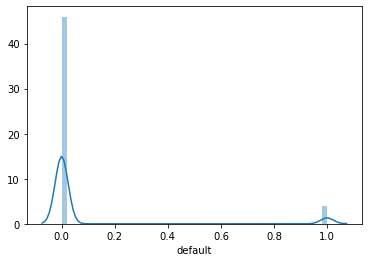

In [248]:
sns.distplot(df['default'])
print('Prop. positive class: {}%'.format(round(df['default'].mean(),3)*100))

(6678, 95)
Prop. positive class: 6.1%


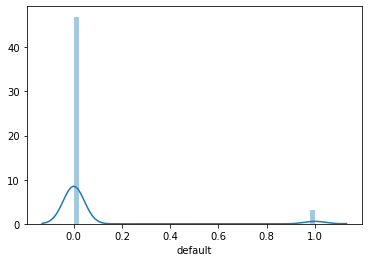

In [249]:
df_nna = df.dropna()
print(df_nna.dropna().shape)
sns.distplot(df_nna['default'])
print('Prop. positive class: {}%'.format(round(df_nna['default'].mean(),3)*100))

When deleting missing values the proportion of the positive class decreases, this means that 1) the missings are not missing at random 2) there are more missing values on the rows of those who default the credit. This brings me the idea of creating a column that accounts for this information

In [250]:
# Column for number of missing information (number of columns with na for each row)
df['missing_count'] = df.isnull().sum(axis=1)

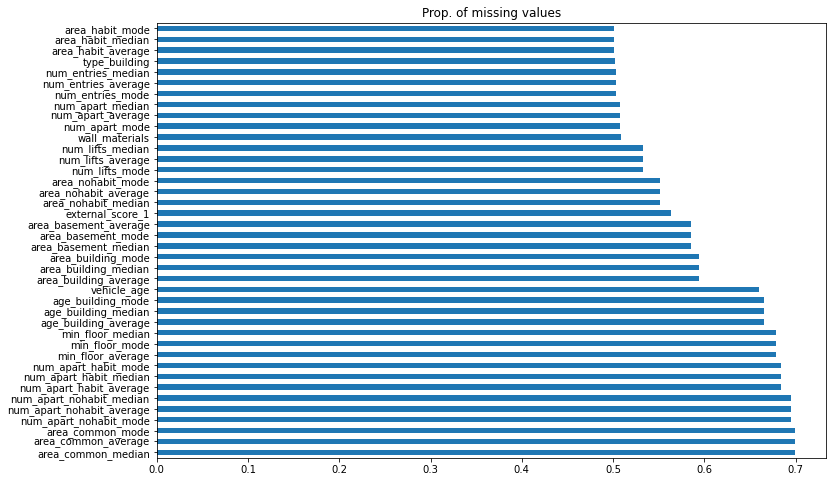

In [251]:
plt.figure(figsize=(12,8))
df.isnull().mean().sort_values(ascending=False)[:40].plot(kind='barh', title='Prop. of missing values')

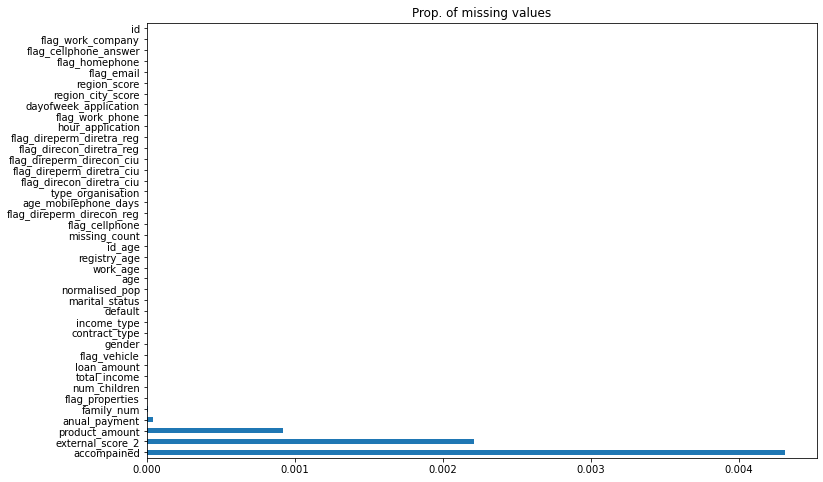

In [252]:
plt.figure(figsize=(12,8))
df.isnull().mean().sort_values(ascending=False)[-40:].plot(kind='barh', title='Prop. of missing values')

Correlation plots:

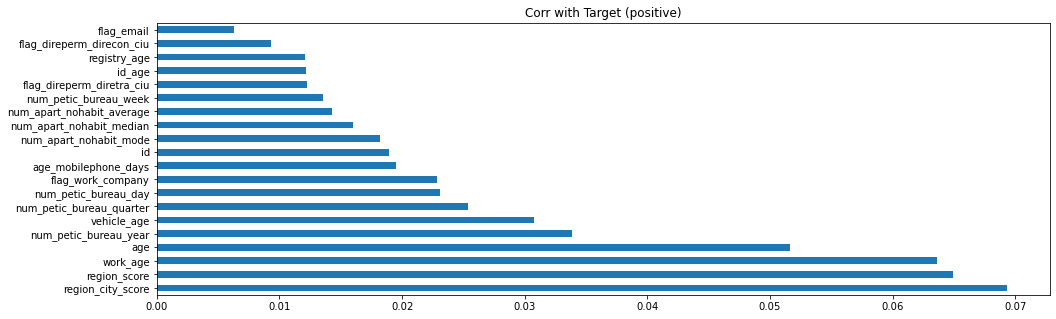

In [253]:
plt.figure(figsize=(16,5))
df_nna.corr()['default'].sort_values(ascending=False)[1:21].plot(kind='barh', title='Corr with Target (positive)')

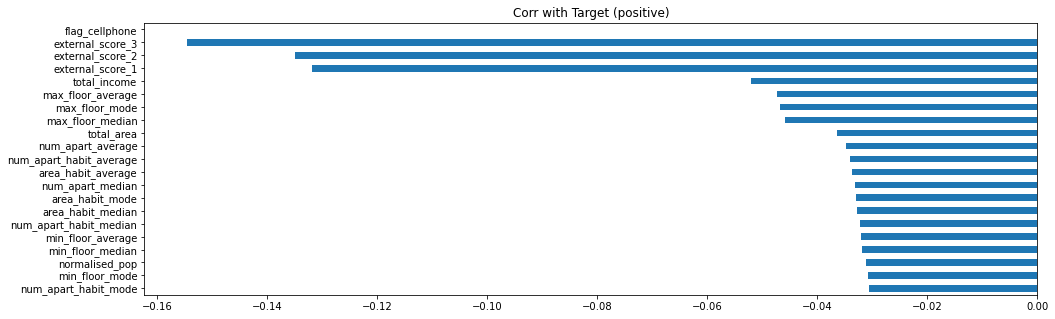

In [254]:
plt.figure(figsize=(16,5))
df_nna.corr()['default'].sort_values(ascending=False)[-21:].plot(kind='barh', title='Corr with Target (positive)')

***What are the most important features in the dataframe with no missing data?***



In [255]:
y_nna = df_nna['default']
X_nna = df_nna.drop(['default'], axis=1)

X_nna = pd.get_dummies(X_nna)

In [256]:
# Simple Logit for feature importance
scaler = StandardScaler()

X_nna_s = scaler.fit_transform(X_nna)

lr_feat_impor = LogisticRegression(C=0.1, penalty='l1', max_iter = 1000, solver='liblinear', class_weight='balanced', random_state=2022)
lr_feat_impor.fit(X_nna_s, y_nna)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=2022, solver='liblinear')

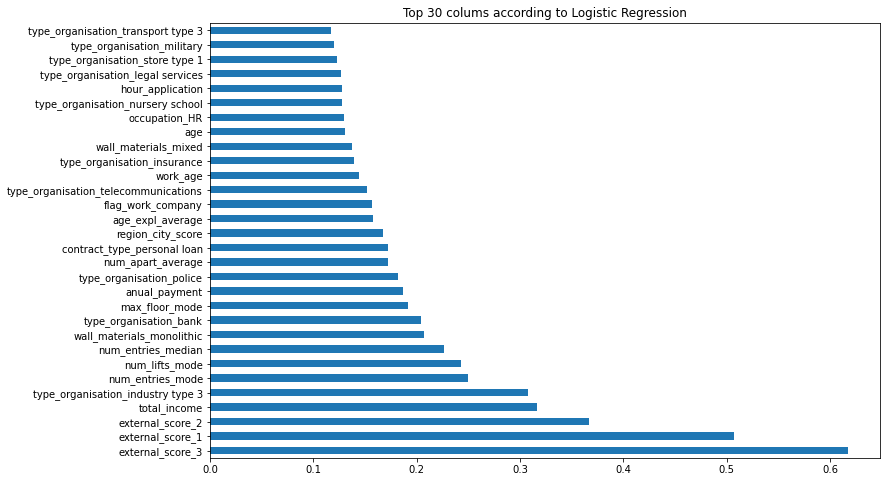

In [257]:
# Plot of feature importance
plt.figure(figsize=(12,8))
lr_feat_impor_s = pd.Series(data=lr_feat_impor.coef_.reshape(-1), index=X_nna.columns).abs()
lr_feat_impor_s.sort_values(ascending=False)[:30].plot(kind='barh', 
                                                       title='Top 30 colums according to Logistic Regression')


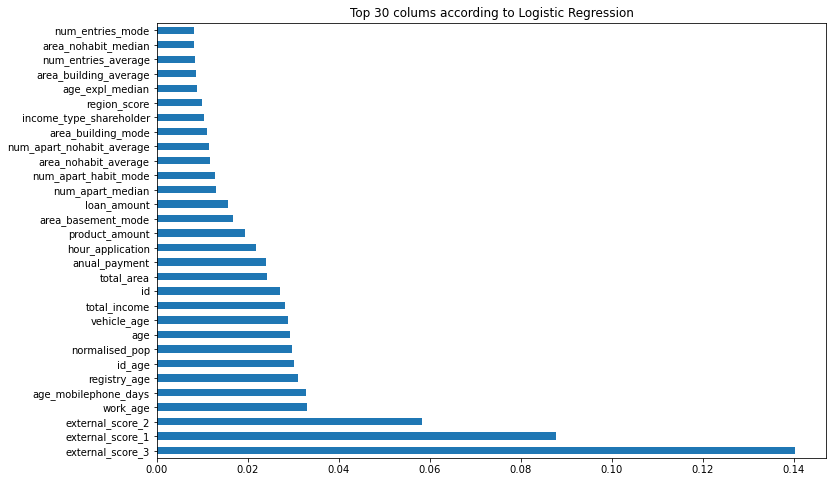

In [258]:
# Simple decision tree for feature importance
dt_feat_impor = DecisionTreeClassifier(class_weight='balanced', random_state=2022)
dt_feat_impor.fit(X_nna_s, y_nna)

plt.figure(figsize=(12,8))
dt_feat_impor_s = pd.Series(data=dt_feat_impor.feature_importances_, index=X_nna.columns).abs()
dt_feat_impor_s.sort_values(ascending=False)[:30].plot(kind='barh', title='Top 30 colums according to Logistic Regression')

Here, rather that asses the feature importance, I want to know what columns are not important and delete those that have many missing values.

In [259]:
# Feature importance lr
lr_feat_impor_df = lr_feat_impor_s.to_frame().reset_index()
lr_feat_impor_df.columns = ['Colname', 'LR_Importance']

# Feature imporntance DT
dt_feat_impor_df = dt_feat_impor_s.to_frame().reset_index()
dt_feat_impor_df.columns = ['Colname', 'DT_Importance']

# Prop of missing values
mv_df = df.isnull().mean().to_frame().reset_index()
mv_df.columns = ['Colname', 'Prop_missing']

# Correlation with the target variable
corr_df = df.corr()['default'].abs().to_frame().reset_index()
corr_df.columns = ['Colname', 'Corr_Importance']

# One dataframe with al the info
missing_a = lr_feat_impor_df.merge(dt_feat_impor_df, on='Colname')
missing_a = missing_a.merge(mv_df, on='Colname')
missing_a = missing_a.merge(corr_df, on='Colname')

missing_a.set_index('Colname', inplace=True)
missing_a.sort_values(by='Prop_missing', ascending=True,inplace=True)
#missing_a

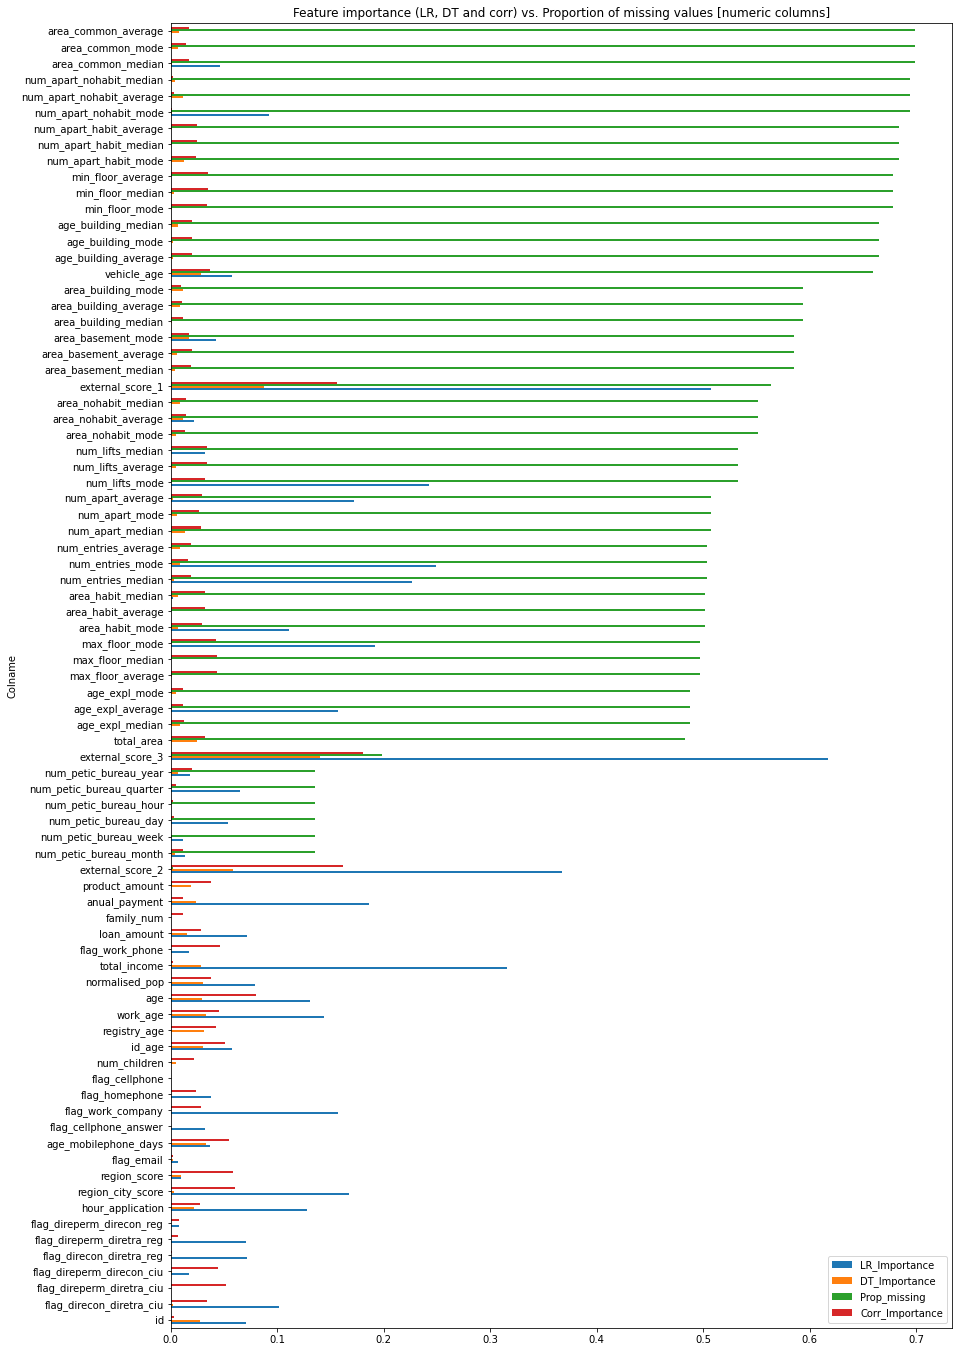

In [260]:
missing_a.plot(kind='barh', 
               figsize=(14,24), 
               title='Feature importance (LR, DT and corr) vs. Proportion of missing values [numeric columns]')

Given the plot above, some columns with a high amount of missing values have low explanatory power or importance. I will delete those columns but keep the information that there were missing values on those variables.

Dummies for missing values for each variable with missing data:

In [261]:
cols_wmissings = list(mv_df.query("Prop_missing>0")['Colname']) # Cols with missing values
num_petic_vars = [col for col in cols_wmissings if col.startswith('num_petic_')] # Cols from petic-bureau

# Cols to create dummies that indicate if there is data or not in that variable
cols_to_dummy_missing = [col for col in cols_wmissings if col.endswith(('mode', 'average'))==False]
cols_to_dummy_missing = [col for col in cols_to_dummy_missing if col not in num_petic_vars[1:]]

print(cols_to_dummy_missing)

# New columns
for col in cols_to_dummy_missing:
    df[col+'_NA'] = df[col].isna().astype(int)

['anual_payment', 'product_amount', 'accompained', 'vehicle_age', 'occupation', 'family_num', 'external_score_1', 'external_score_2', 'external_score_3', 'num_apart_median', 'area_basement_median', 'age_expl_median', 'age_building_median', 'area_common_median', 'num_lifts_median', 'num_entries_median', 'max_floor_median', 'min_floor_median', 'area_building_median', 'num_apart_habit_median', 'area_habit_median', 'num_apart_nohabit_median', 'area_nohabit_median', 'type_building', 'total_area', 'wall_materials', 'emergency_exits', 'num_petic_bureau_hour']


Delete columns with low importance given the analysis above:

In [262]:
# Look the criteria to delete the columns: more that a 40% of missing and importance lower that 0.1 in the graphs above
to_detele_cols = missing_a.query("Prop_missing>0.4 & LR_Importance<0.1 & DT_Importance<0.1 & Corr_Importance<0.1").sort_values(by='LR_Importance', ascending=False).index.to_list()

print(len(to_detele_cols))
print(to_detele_cols)
df.drop(to_detele_cols, axis=1, inplace=True)

37
['num_apart_nohabit_mode', 'vehicle_age', 'area_common_median', 'area_basement_mode', 'num_lifts_median', 'area_nohabit_average', 'area_habit_median', 'area_building_mode', 'age_building_average', 'age_building_mode', 'age_building_median', 'min_floor_mode', 'min_floor_median', 'total_area', 'min_floor_average', 'num_apart_habit_median', 'num_apart_habit_average', 'num_apart_nohabit_average', 'num_apart_nohabit_median', 'area_common_mode', 'num_apart_habit_mode', 'area_building_median', 'area_building_average', 'age_expl_median', 'area_basement_average', 'area_basement_median', 'area_nohabit_median', 'area_nohabit_mode', 'num_lifts_average', 'num_apart_mode', 'num_apart_median', 'num_entries_average', 'area_habit_average', 'max_floor_median', 'max_floor_average', 'age_expl_mode', 'area_common_average']


Fill missing with cero because probabily those varables are for people has that the asset, for example house with a basement

In [263]:
fill_with_0 = ['num_lifts_mode', 'num_apart_average', 'num_entries_median', 'num_entries_mode','area_habit_mode', 'max_floor_mode', 'emergency_exits']
df[fill_with_0]= df[fill_with_0].fillna(0)

Filling with kind: 'unknowing'

In [264]:
fill_with_unknow = ['wall_materials', 'occupation', 'type_building']
df[fill_with_unknow] = df[fill_with_unknow].fillna('fill_with_unknow')

Other in accompained to fill missing values

In [265]:
df['accompained'] = df['accompained'].replace(to_replace=['other_2', 'other_1', 'group', np.nan], value='other')

Fill missing values in the scores

In [266]:
import statsmodels.api as sm

df_fill_scores = df[['external_score_1', 'external_score_2',  'external_score_3', 'age']].dropna()
df_fill_scores['age'] = df_fill_scores['age'] / 360

y = df_fill_scores['external_score_1']
X = df_fill_scores.drop('external_score_1',axis=1)

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       external_score_1   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          2.727e+05
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                        0.00
Time:                        11:05:05   Log-Likelihood:                          30955.
No. Observations:               82123   AIC:                                 -6.190e+04
Df Residuals:                   82120   BIC:                                 -6.188e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [267]:
y = df_fill_scores['external_score_2']
X = df_fill_scores.drop('external_score_2',axis=1)

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       external_score_2   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                          1.843e+05
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                        0.00
Time:                        11:05:05   Log-Likelihood:                          15093.
No. Observations:               82123   AIC:                                 -3.018e+04
Df Residuals:                   82120   BIC:                                 -3.015e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [268]:
y = df_fill_scores['external_score_3']
X = df_fill_scores.drop('external_score_3',axis=1)

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       external_score_3   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                          1.647e+05
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                        0.00
Time:                        11:05:05   Log-Likelihood:                          15070.
No. Observations:               82123   AIC:                                 -3.013e+04
Df Residuals:                   82120   BIC:                                 -3.011e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

With the outputs from above I know that there is a statistical relationship amonth the three scores and the age and with this information I will fill the missing values for each of the scores

In [269]:
# Fill the missing values

for iter_ in range(5):
    df['external_score_1'] = 0.1190 * df['external_score_2'] + 0.0504 * df['external_score_3'] - 0.0103 * df['age']/360
    df['external_score_2'] = 0.1751 * df['external_score_1'] + 0.2893 * df['external_score_3'] - 0.0067 * df['age']/360
    df['external_score_3'] = 0.0742 * df['external_score_1'] + 0.2895 * df['external_score_2'] - 0.0071 * df['age']/360

    print('Iter:', iter_, df['external_score_1'].isnull().value_counts().loc[True], 
          df['external_score_2'].isnull().value_counts().loc[True],
          df['external_score_3'].isnull().value_counts().loc[True])


Iter: 0 46032 46032 46032
Iter: 1 46032 46032 46032
Iter: 2 46032 46032 46032
Iter: 3 46032 46032 46032
Iter: 4 46032 46032 46032


In [270]:
# Column to take into consideration this
df['no_external_score'] = np.where(df['external_score_1'].isna(), 1, 0)

Fill the rest of values with the average by some variables 

In [271]:
# Issues with the age
df[['age', 'id_age', 'work_age', 'registry_age']].corr()

,age,id_age,work_age,registry_age
age,1.000000,0.272922,-0.616138,0.331667
id_age,0.272922,1.000000,-0.272776,0.103472
work_age,-0.616138,-0.272776,1.000000,-0.210521
registry_age,0.331667,0.103472,-0.210521,1.000000


High negative correlation of ´age´ with ´work_age´ wich gives us the idea that age has a negative sing. Besides the max value of age in years is around -20 years.

In [272]:
# Create age in years and group of age
df['age'] = (df['age'] / 365) * -1
df['age_group'] = pd.cut(df['age'], 
                         bins = [0, 25, 35, 45, 60, df['age'].max()+1],
                         labels = ['<25', '25-34', '35-44', '45-59', '60>'])

In [273]:
df_ = df.copy()
#df = df_.copy()

In [274]:
fill_with_group_avg = ['age_expl_average', 'external_score_1', 'external_score_2', 'external_score_3', 'num_petic_bureau_hour',
                      'num_petic_bureau_year', 'num_petic_bureau_quarter', 'num_petic_bureau_month', 'num_petic_bureau_week', 'num_petic_bureau_day',
                       'product_amount', 'anual_payment', 'age_mobilephone_days', 'family_num']

In [275]:
group = ['gender', 'age_group', 'marital_status']

for col in fill_with_group_avg:
    df[col] = df[col].fillna(df.groupby(group)[col].transform('mean'))
    
    # The rest with the global mean
    df[col] = df[col].fillna(df[col].mean())

In [276]:
any(df.isnull().sum()>0)

False

Finally, no missing data!


Now I do the same in the validation dataset using the function from the preprocessing.py file

In [277]:
val_df = missings_preprocessing(val_df, df_) # ussing the training dataframe before filling nas
print(any(val_df.isnull().sum()>0))
print(val_df.shape)
print(df.shape)

False
(76878, 89)
(230633, 89)


## More on feature engineering and preprocessing

In [278]:
df.describe()

,id,default,num_children,total_income,loan_amount,anual_payment,product_amount,normalised_pop,age,work_age,...,num_apart_habit_median_NA,area_habit_median_NA,num_apart_nohabit_median_NA,area_nohabit_median_NA,type_building_NA,total_area_NA,wall_materials_NA,emergency_exits_NA,num_petic_bureau_hour_NA,no_external_score
count,230633.000000,230633.000000,230633.000000,2.306330e+05,2.306330e+05,230633.000000,2.306330e+05,230633.000000,230633.000000,230633.000000,...,230633.000000,230633.000000,230633.000000,230633.000000,230633.000000,230633.000000,230633.000000,230633.000000,230633.000000,230633.000000
mean,278093.914418,0.080730,0.418604,1.688828e+05,5.989798e+05,27100.607523,5.382761e+05,0.020870,43.924744,63805.540478,...,0.683913,0.501515,0.694601,0.551569,0.501684,0.482598,0.508193,0.473774,0.135284,0.199590
std,102814.762419,0.272421,0.724151,2.673811e+05,4.021042e+05,14479.225491,3.689609e+05,0.013826,11.951582,141266.924549,...,0.464948,0.499999,0.460577,0.497335,0.499998,0.499698,0.499934,0.499313,0.342028,0.399693
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,21.021918,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189044.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,0.010006,33.994521,-2758.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277957.000000,0.000000,0.000000,1.462500e+05,5.147775e+05,24903.000000,4.500000e+05,0.018850,43.126027,-1212.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,367102.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,53.912329,-289.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Fix the ages:

In [279]:
df['id_age'] = df['id_age'] * -1
df['registry_age'] = df['registry_age'] * -1
df['age_mobilephone_days'] = df['age_mobilephone_days'] * -1

More feature from the scores

In [280]:
df['external_score_min'] = df[['external_score_1', 'external_score_2', 'external_score_3']].min(axis=1)
df['external_score_max'] = df[['external_score_1', 'external_score_2', 'external_score_3']].max(axis=1)
df['external_score_median'] = df[['external_score_1', 'external_score_2', 'external_score_3']].median(axis=1)
df['external_score_mean'] = df[['external_score_1', 'external_score_2', 'external_score_3']].mean(axis=1)

In [281]:
# the same as above but in the validation dataset
val_df = more_preprocessing(val_df)                            

In [282]:
print(df.shape)
print(val_df.shape)

(230633, 93)
(76878, 93)


# Modelling the default

## Logistic model


In [344]:
y_train = df['default'].copy()
X_train = df.drop('default', axis=1).copy()

ohot_encoder = ce.OneHotEncoder()
ohot_encoder.fit(X_train)

X_train_ = ohot_encoder.transform(X_train)

y_val = val_df['default'].copy()
X_val = val_df.drop('default', axis=1).copy()

X_val_ = ohot_encoder.transform(X_val)

print(X_train_.shape, X_val_.shape, y_train.shape, y_val.shape)

(230633, 210) (76878, 210) (230633,) (76878,)


In [345]:
scaler = MinMaxScaler()
scaler.fit(X_train_)

X_train_s = pd.DataFrame(scaler.transform(X_train_), columns=X_train_.columns)
X_val_s = pd.DataFrame(scaler.transform(X_val_), columns=X_train_.columns)

In [346]:
lr = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', class_weight='balanced', random_state=2022)
lr.fit(X_train_s, y_train)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=2022, solver='liblinear')

In [347]:
# Classes 
in_pred_lr = lr.predict(X_train_s)
out_pred_lr = lr.predict(X_val_s)

# Proba 
in_proba_lr = lr.predict_proba(X_train_s)
out_proba_lr = lr.predict_proba(X_val_s)

Naive: ROC AUC=0.500
Logistic: ROC AUC=0.680


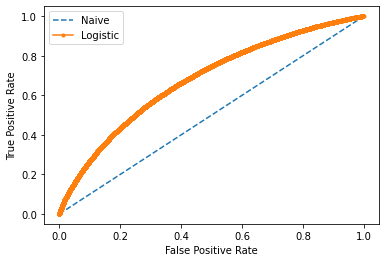

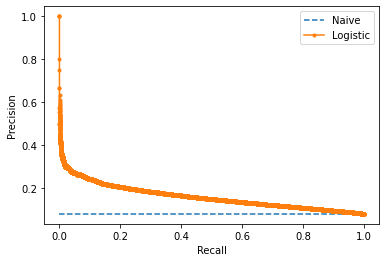

In [348]:
# Insample metrics
roc_auc_curve_plot(y_train, in_proba_lr[:,1], name='Logistic')
precision_recall_curve_plot(y_train, in_proba_lr[:,1], name='Logistic')

Naive: ROC AUC=0.500
Logistic: ROC AUC=0.678


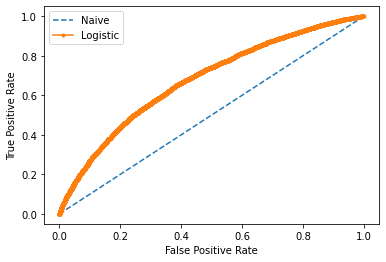

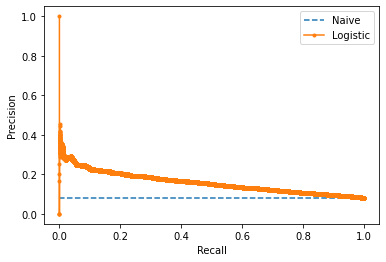

In [349]:
# out-sample metrics
roc_auc_curve_plot(y_val, out_proba_lr[:,1], name='Logistic')
precision_recall_curve_plot(y_val, out_proba_lr[:,1], name='Logistic')

In [350]:
print(classification_report(y_val,out_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76     70672
           1       0.13      0.62      0.22      6206

    accuracy                           0.64     76878
   macro avg       0.54      0.63      0.49     76878
weighted avg       0.88      0.64      0.72     76878



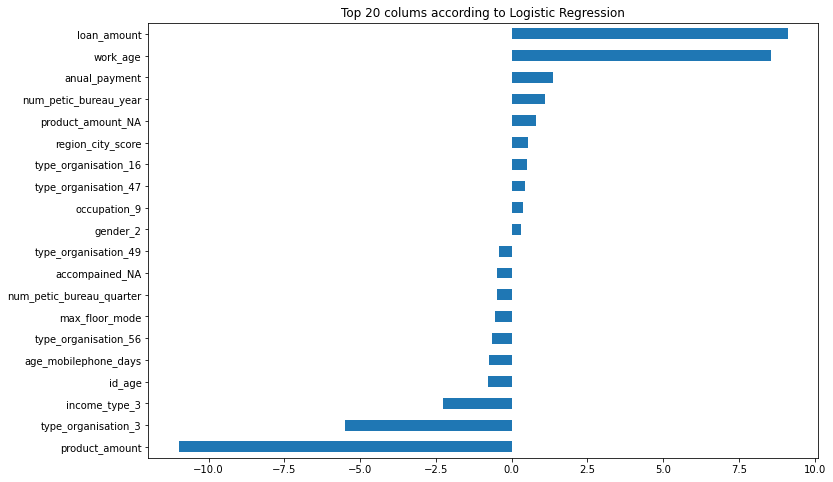

In [351]:
# Plot of feature importance of logistic regression
plt.figure(figsize=(12,8))
feat_impo_lr = pd.Series(data=lr.coef_.reshape(-1), index=X_train_.columns).sort_values()

pd.concat([feat_impo_lr.head(10), feat_impo_lr.tail(10)]).plot(kind='barh', 
                                                       title='Top 20 colums according to Logistic Regression')

## Random Forest

In [352]:
rf = RandomForestClassifier(class_weight='balanced', random_state=2022, max_depth=7)
rf.fit(X_train_, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, random_state=2022)

In [353]:
# Classes 
in_pred_rf = rf.predict(X_train_)
out_pred_rf = rf.predict(X_val_)

# Proba 
in_proba_rf = rf.predict_proba(X_train_)
out_proba_rf = rf.predict_proba(X_val_)

In [354]:
# Calibration of probabilities
cali_obj = CalibratedClassifierCV(rf, cv = 5)
cali_obj.fit(X_train_, y_train)

out_proba_rf_rc = cali_obj.predict_proba(X_val_)

In sample results

Naive: ROC AUC=0.500
RF: ROC AUC=0.678


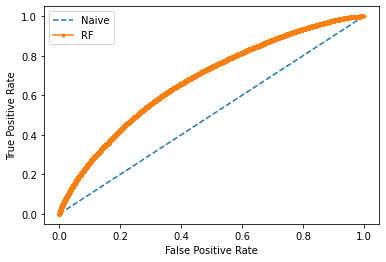

In [355]:
roc_auc_curve_plot(y_train, in_proba_rf[:,1], name='RF')

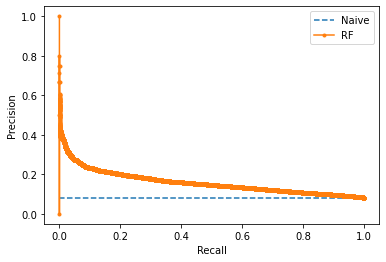

In [356]:
precision_recall_curve_plot(y_train, in_proba_rf[:,1], name='RF')

Out sample results

Naive: ROC AUC=0.500
RF: ROC AUC=0.655


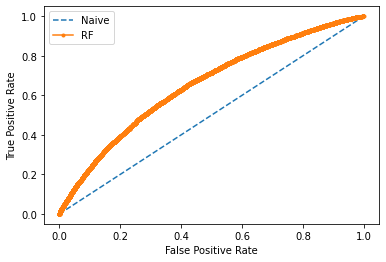

In [357]:
roc_auc_curve_plot(y_val, out_proba_rf_rc[:,1], name='RF')

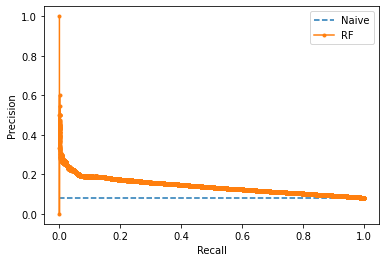

In [358]:
precision_recall_curve_plot(y_val, out_proba_rf[:,1], 'RF')

In [359]:
print(classification_report(y_val,out_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77     70672
           1       0.13      0.58      0.21      6206

    accuracy                           0.64     76878
   macro avg       0.54      0.61      0.49     76878
weighted avg       0.88      0.64      0.72     76878



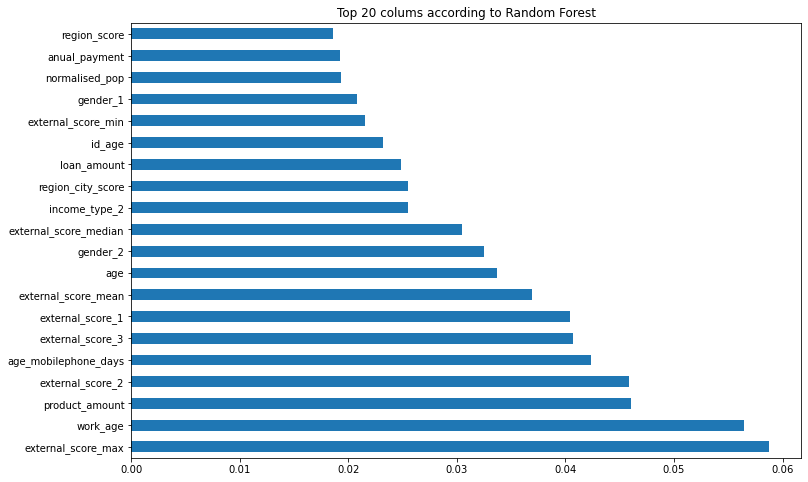

In [360]:
# Plot of feature importance of random forest
plt.figure(figsize=(12,8))
feat_impo_rf = pd.Series(data=rf.feature_importances_, index=X_train_.columns).sort_values(ascending=False)
feat_impo_rf

feat_impo_rf[:20].plot(kind='barh', title='Top 20 colums according to Random Forest')

Both models show a low predictive power, although both models are better than guessing on who to give the loans.

Naive: ROC AUC=0.500
Ensamble: ROC AUC=0.679


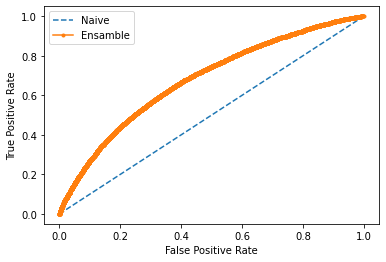

In [361]:
avg_proba = out_proba_lr[:,1] * 0.5 + out_proba_rf_rc[:,1] * 0.5
roc_auc_curve_plot(y_val, avg_proba, name='Ensamble')

At this point, better than trying a hyperparameter tuning I should go back and see what happens with the data. However, lets see a bit more about the intepreatavility of the model.